In [50]:
#Importação das bibliotecas necessárias

import os
import string
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import itertools
import collections

import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize


In [5]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [7]:
diretorio_arquivo = r'D:\Wesley\VersionCode\AprendendoPython\AprendendoPython\MachineLearning\Analises Sentimento\Datasets\avaliacoes_train.csv'

diretorio_pc_casa =r'D:\Wesley\Python\AprendendoPython\MachineLearning\Analises Sentimento\Datasets\avaliacoes_train.csv'

In [8]:
dados = pd.read_csv(diretorio_pc_casa)

dados.head(10)

,ID,Avaliacao,Titulo,Texto
0,3,0,Sempre muito bom,Atendimento impecável comida muito boa e rápi...
1,7,0,Top,Um dos melhores de Brasília recomendo muito ms...
2,10,0,Excelente atendimento,Nunca fui tão bem atendido em um restaurante ...
3,11,0,Vista privilegiada,Lugar maravilhoso com vista para o Lago Sul em...
4,16,0,Jantar,Excelente Janiel. Tanto sua receptividade qu...
5,17,0,Boa opção para jantar,É um restaurante é grande e bem decorado. Ficá...
6,18,0,Ótimo,Numa 5f almoçamos no sistema self service com ...
7,26,0,Perfeito. Vista maravilhosa,Jantamos hj no restaurante. Atendimento nota 1...
8,27,0,Jantar numa ala reservada.,Estivemos num jantar como uma extensão de um d...
9,29,0,Melhor Da cidade!!!,Sempre uma boa surpresa bom ambiente ótimo s...


## Limpeza de dados 
1.remoção de pontuação 
2.remoção de url
2.geração de token
2.remoção de stop_words
2.remoção de url

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PCSOLUTION\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [11]:
custon_stop_words = ['nessa','todo','pra','vou','aqui','se','.',',','lá','vcs','pois','"',':','``']
punctuation = list(string.punctuation)
lista_stopwords  = set(stopwords.words('portuguese') + punctuation + custon_stop_words+ ['rt', 'via'])

### funçoes

In [12]:
def remove_url(texto):
    return re.sub(r'http\S+', '', texto)

In [13]:
def set_tokenize(texto):
    return word_tokenize(texto)

In [14]:
def remove_stop_Words(texto,lista_stopwords):
    palavras =set_tokenize(texto)
    palavras_sem_stopwords = [palavra.lower() for palavra in palavras if palavra.lower() not in lista_stopwords]
    return str(palavras_sem_stopwords)

In [15]:
def remove_caracteres_especiais(texto):
    punctuations = '''!()-![]{};:+'"\,<>./?@#$%^&*_~'''
    remove = ''.join([i for i in texto if not i in punctuations])
    remove_1 =  re.sub(r" ?\([^)]+\)", "", remove)
    remove_2 =''.join(remove_1).replace("'", " ")
    remove_3 =''.join(remove_2).replace("[", " ")
    remove_4 =''.join(remove_3).replace("]", " ")
    return str(remove_4)    

### recuperar o conteudo a ser trabalhado



In [16]:
conteudo = dados['Texto']

## Mostra o antes e o depois do processamento

In [18]:
type(conteudo)

pandas.core.series.Series

In [17]:
conteudo[0:10]

0    Atendimento impecável  comida muito boa e rápi...
1    Um dos melhores de Brasília recomendo muito ms...
2    Nunca fui tão bem atendido em um restaurante  ...
3    Lugar maravilhoso com vista para o Lago Sul em...
4    Excelente  Janiel. Tanto sua receptividade  qu...
5    É um restaurante é grande e bem decorado. Ficá...
6    Numa 5f almoçamos no sistema self service com ...
7    Jantamos hj no restaurante. Atendimento nota 1...
8    Estivemos num jantar como uma extensão de um d...
9    Sempre uma boa surpresa  bom ambiente  ótimo s...
Name: Texto, dtype: object

## Limpeza dos dados

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PCSOLUTION\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [21]:
conteudo_sem_urls = [remove_url(texto) for texto in conteudo]

remove_stop=  [remove_stop_Words(palavra.lower(),lista_stopwords) for palavra in conteudo_sem_urls]

palavras_em_comentario = [remove_caracteres_especiais(palavra.lower()).split() for palavra in remove_stop]


palavras_em_comentario[:2]


[['atendimento',
  'impecável',
  'comida',
  'boa',
  'rápida',
  'recomendo',
  'esperar',
  'mesa',
  'varanda',
  'vista',
  'paranoá',
  'faz',
  'toda',
  'diferença'],
 ['melhores',
  'brasília',
  'recomendo',
  'msm',
  'podem',
  'ir',
  'medo',
  'ser',
  'feliz',
  'ambiente',
  'agradável']]

## Pre-Normalização 2

1.Correção de ortografia

In [97]:
from autocorrect import spell

## Calcular a frequencia de palavras


In [22]:
all_comentarios_list = list(itertools.chain(*palavras_em_comentario))

# Create counter
counts_list = collections.Counter(all_comentarios_list)

counts_list.most_common(15)

[('atendimento', 12044),
 ('comida', 11891),
 ('bem', 9484),
 ('restaurante', 7786),
 ('bom', 7760),
 ('ambiente', 7709),
 ('excelente', 6582),
 ('pratos', 5669),
 ('boa', 5174),
 ('agradável', 4690),
 ('preço', 4042),
 ('lugar', 3754),
 ('sempre', 3644),
 ('ótimo', 3212),
 ('local', 3194)]

In [23]:



dataframe = pd.DataFrame(counts_list.most_common(20),
                             columns=['termo', 'quantidade'])

dataframe.head(10)


,termo,quantidade
0,atendimento,12044
1,comida,11891
2,bem,9484
3,restaurante,7786
4,bom,7760
5,ambiente,7709
6,excelente,6582
7,pratos,5669
8,boa,5174
9,agradável,4690


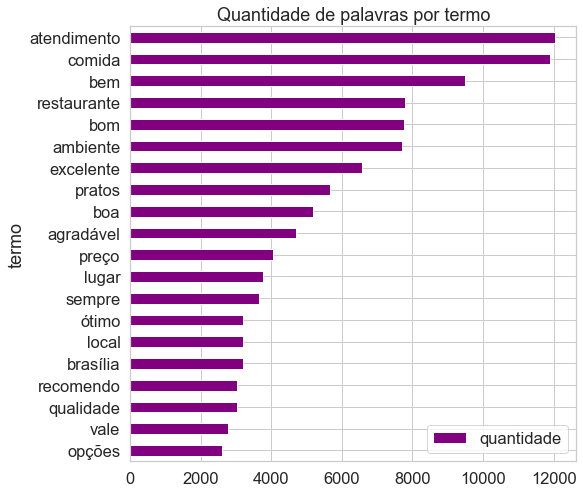

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
dataframe.sort_values(by='quantidade').plot.barh(x='termo',
                      y='quantidade',
                      ax=ax,
                      color="purple")

ax.set_title("Quantidade de palavras por termo")

plt.show()

# Gera todas as palavras dos comentários


In [41]:
## gera as palavras 
words_in_file = list(palavras_em_comentario)

todas_palavras =str(all_comentarios_list)



In [67]:
palavras_em_comentario[0]

['atendimento',
 'impecável',
 'comida',
 'boa',
 'rápida',
 'recomendo',
 'esperar',
 'mesa',
 'varanda',
 'vista',
 'paranoá',
 'faz',
 'toda',
 'diferença']

## explorando os bigramas


In [43]:
tweets_nsw = [[word for word in tweet_words if not word in lista_stopwords]
              for tweet_words in words_in_file]


collection_words = ['climatechange', 'climate', 'change']

tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]              

terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw_nc]   




In [44]:
bigrams = list(itertools.chain(*terms_bigram))

bigram_counts = collections.Counter(bigrams)


                       

In [57]:

dataframe_bigrama = pd.DataFrame(bigram_counts.most_common(1000),
                             columns=['bigram', 'count'])

dataframe_bigrama.head(60)      

,bigram,count
0,"(ambiente, agradável)",1929
1,"(vale, pena)",1923
2,"(comida, boa)",1614
3,"(atendimento, bom)",1397
4,"(bom, atendimento)",1230
5,"(coco, bambu)",1154
6,"(frutos, mar)",1119
7,"(excelente, atendimento)",964
8,"(atendimento, excelente)",913
9,"(ótimo, atendimento)",911


## gerar um grafico dos bigramas

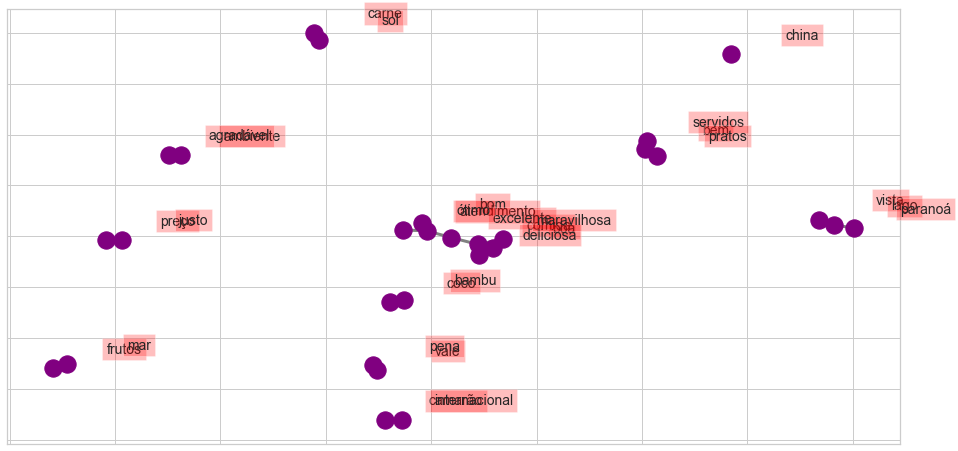

In [46]:
# Create dictionary of bigrams and their counts
d = dataframe_bigrama.head(20).set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 2))

G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(16, 8))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.075
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=14)
    
plt.show()

# Nuvens de palavras


In [40]:
pip install wordcloud

  Using cached wordcloud-1.6.0.tar.gz (214 kB)
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\PCSOLUTION\AppData\Local\Programs\Python\Python37-32\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\PCSOLU~1\\AppData\\Local\\Temp\\pip-install-dcuc70z7\\wordcloud\\setup.py'"'"'; __file__='"'"'C:\\Users\\PCSOLU~1\\AppData\\Local\\Temp\\pip-install-dcuc70z7\\wordcloud\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\PCSOLU~1\AppData\Local\Temp\pip-record-hym6g2is\install-record.txt' --single-version-externally-managed --compile --install-headers 'C:\Users\PCSOLUTION\AppData\Local\Programs\Pyt

In [ ]:
from wordcloud import WordCloud

sanais', 'sucos', 'varias', 'opções', 'café', 'ovos', 'mexidos', 'tudo', 'saboroso', 'voltarei', 'vezes', 'pontos', 'positivos', 'todos', 'dias', 'prato', 'camarão', 'tempero', 'comidas', 'ambiente', 'arejado', 'lado', 'atendimento', 'pontos', 'negativos', 'estacionamento', 'sugiro', 'parar', 'quadra', 'estacionamento', 'primeiro', 'bloco', 'virado', '300', 'espaço', 'interno', 'pequeno', 'máximo', 'umas', '15', 'mesas', 'ausência', 'restaurante', 'boa', 'opção', 'comida', 'self', 'service', 'asa', 'norte', 'variedade', 'comidas', 'bem', 'elaboradas', 'contudo', 'preço', 'melhores', 'variedade', 'pratos', 'todos', 'sabor', 'especial', 'comida', 'caseira', 'garçons', 'atenciosos', 'ambiente', 'familiar', 'certo', 'conforto', 'apesar', 'ser', 'restaurante', 'rural', 'entretanto', 'comida', 'deixou', 'desejar', 'ítens', 'corriqueiros', 'servidos', 'contento', 'lugar', 'simples', 'opções', 'agradáveis', 'café', 'lanche', 'preço', 'justo', 'tudo', 'saboroso', 'precisam', 'trocar', 'cadeiras

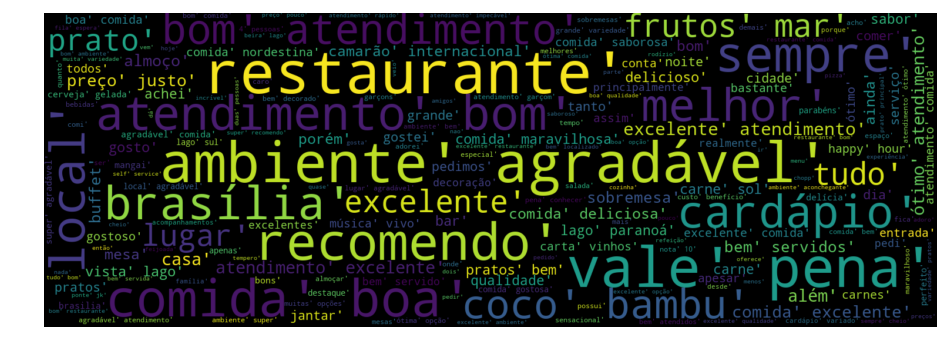

In [410]:
## https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

mapa_cores =ListedColormap(['orange','gren','red','magenta'])

nuvem = WordCloud(background_color='white',
                colormap=mapa_cores,
                max_words =100,
                 max_font_size=100,width = 1520, height = 535).generate(str(palavras_em_comentario))
plt.figure(figsize=(16,9))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

## Analise de sentimentos

In [54]:
dataframe_bigrama

,bigram,count
0,"(ambiente, agradável)",1929
1,"(vale, pena)",1923
2,"(comida, boa)",1614
3,"(atendimento, bom)",1397
4,"(bom, atendimento)",1230
5,"(coco, bambu)",1154
6,"(frutos, mar)",1119
7,"(excelente, atendimento)",964
8,"(atendimento, excelente)",913
9,"(ótimo, atendimento)",911


In [ ]:
termos_positivos =['recomendo','boa','bem','maravilhosa']

In [60]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [63]:
palavras_em_comentario[0:1]

[['atendimento',
  'impecável',
  'comida',
  'boa',
  'rápida',
  'recomendo',
  'esperar',
  'mesa',
  'varanda',
  'vista',
  'paranoá',
  'faz',
  'toda',
  'diferença']]

In [73]:
palavras_em_comentario[0]

from textblob import TextBlob

for texto in dados["Texto"]:
    frase = TextBlob(texto)

    if frase.detect_language() != 'en':
        traducao = TextBlob(str(frase.translate(to='en')))
        print('Tweet: {0} - Sentimento: {1}'.format(texto, traducao.sentiment))
    else:
        print('Tweet: {0} - Sentimento: {1}'.format(texto, frase.sentiment))


HTTPError: HTTP Error 429: Too Many Requests

In [61]:
from textblob import TextBlob

for texto in dados["Texto"]:
    frase = TextBlob(texto)

    if frase.detect_language() != 'en':
        traducao = TextBlob(str(frase.translate(to='en')))
        print('Tweet: {0} - Sentimento: {1}'.format(texto, traducao.sentiment))
    else:
        print('Tweet: {0} - Sentimento: {1}'.format(texto, frase.sentiment))

olarity=0.3875, subjectivity=0.6)
Tweet: O atendimento é excelente. Sempre que venho fico encantada. Música ambiente ótima!!! Comi camarão mediterrâneo  estava uma delícia. Provem o cheasecacke  é sem igual. Fui atendida pelo Marcos. Muito carismático e atencioso. - Sentimento: Sentiment(polarity=0.7321428571428573, subjectivity=0.9071428571428573)
Tweet: Ótima localização  ambiente agradável  bem distribuídas as mesas  ótimo atendimento e cozinha especializada em Frutos do Mar Impecável  com pratos variados. Serve também carnes e frangos  porém o carro chefe da excelente cozinha são os frutos do mar  servidos sempre com precisão e qualidade impecável. - Sentimento: Sentiment(polarity=0.8388888888888889, subjectivity=0.8694444444444445)
Tweet: Esse restaurante é muito frequentado pelas pessoas da cidade  sempre oferecendo ótimas promoções e uma comida bem variada mas com foco nos frutos do mar e como a venda mais elevada em pratos que vão camarão! Sugiro realizar a reserva antecipada p

HTTPError: HTTP Error 429: Too Many Requests

In [53]:
dados['Classificacao'] =''

In [58]:
len(dados)

28980